In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import re

In [371]:
df=pd.read_csv('E:/jupyternotebook/h1b/h-1b-visa/h1b_kaggle.csv')

DATASET COLUMNS DESCRIPTION:

<B>CASE_ID</B> - A unique case ID for every applicant.<BR>
<B>CASE_STATUS</B> – The target variable consists of 4 different classes or values. Status is associated with the last significant event.<BR>
<B>EMPLOYER_NAME</B> – Name of the employer submitting the application.<BR>
<B>SOC_NAME</B> – Occupational name associated with an occupational code<BR>
<B>JOB_Title</B> – Title of the Job<BR>
<B>FULL_TIME_POSITION</B> – Whether the position is full time or not<BR>
<B>PREVAILING_WAGE</B> - The prevailing wage for a job position is defined as the average wage paid to similarly employed workers in the requested occupation in the area of intended employment<BR>
<B>YEAR</B> – Year in which h1b petition was filed<BR>
<B>WORKSITE</B> - City and State information of the foreign worker’s intended area of employment<BR>
<B>Lon</B> – Longitude of the worksite<BR>
<B>Lat</B> – Latitude of the worksite<BR>

In [372]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
CASE_ID               1048575 non-null int64
CASE_STATUS           1048575 non-null object
EMPLOYER_NAME         1048556 non-null object
SOC_NAME              1048564 non-null object
JOB_TITLE             1048567 non-null object
FULL_TIME_POSITION    1048574 non-null object
PREVAILING_WAGE       1048571 non-null float64
YEAR                  1048575 non-null int64
WORKSITE              1048575 non-null object
lon                   1019007 non-null float64
lat                   1019007 non-null float64
dtypes: float64(3), int64(2), object(6)
memory usage: 88.0+ MB


,CASE_ID,PREVAILING_WAGE,YEAR,lon,lat
count,1.048575e+06,1.048571e+06,1.048575e+06,1.019007e+06,1.019007e+06
mean,5.242880e+05,8.942724e+04,2.015618e+03,-9.224186e+01,3.816965e+01
std,3.026977e+05,1.643214e+06,4.859268e-01,1.936639e+01,4.606127e+00
min,1.000000e+00,0.000000e+00,2.015000e+03,-1.578583e+02,1.343719e+01
25%,2.621445e+05,5.636800e+04,2.015000e+03,-1.118910e+02,3.415175e+01
50%,5.242880e+05,6.651800e+04,2.016000e+03,-8.648955e+01,3.908400e+01
75%,7.864315e+05,8.247200e+04,2.016000e+03,-7.559826e+01,4.088374e+01
max,1.048575e+06,3.291392e+08,2.016000e+03,1.457298e+02,6.483778e+01


In [373]:
df.head()

,CASE_ID,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016,"ST. LOUIS, MISSOURI",-90.199404,38.627003


4 DIFFERENT CASE_STATUS

In [374]:
df['CASE_STATUS'].value_counts()

CERTIFIED              914251
CERTIFIED-WITHDRAWN     83160
WITHDRAWN               35494
DENIED                  15670
Name: CASE_STATUS, dtype: int64

For binary class classification, we would classify CASE_STATUS as either Certified or Denied.

In [375]:
# Removing withdrawn status
df=df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)


In [376]:
df=df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)

In [377]:
df['CASE_STATUS'].value_counts()

CERTIFIED    914251
DENIED        15670
Name: CASE_STATUS, dtype: int64

In [378]:
print(15670.00/(914251.00+15670.00))

0.0168508937856


In [379]:
##check count of NAN
count_nan = len(df) - df.count()
print(count_nan)

CASE_ID                   0
CASE_STATUS               0
EMPLOYER_NAME            12
SOC_NAME                  6
JOB_TITLE                 3
FULL_TIME_POSITION        1
PREVAILING_WAGE           3
YEAR                      0
WORKSITE                  0
lon                   26082
lat                   26082
dtype: int64


In [380]:
df['EMPLOYER_NAME'].mode()[0]

'INFOSYS LIMITED'

In [381]:
## Filling na in employer name with mode
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0])

In [382]:
## Filling na in JOB_TITLE and FULL_TIME_POSITION with mode
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])
df['JOB_TITLE'] = df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0])
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0])
df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].mode()[0])

In [383]:
# Dropping lat and lon columns
df = df.drop('lat', axis = 1)
df = df.drop('lon', axis = 1)

In [384]:
##check count of NAN
count_nan = len(df) - df.count()
print(count_nan)

CASE_ID               0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64


In [385]:
def boxplot(df,col):
    """
    This function plot boxplot of certain feature in each class of target variable
    - df: dataframe
    - col: feature column
    """
    data_to_plot = [df[df['CASE_STATUS']=='CERTIFIED'][col],df[df['CASE_STATUS']=='DENIED'][col]]
    # Create a figure instance
    fig = plt.figure(figsize=(9, 6))
    # Create an axes instance
    ax = fig.add_subplot(111)
    # Create the boxplot
    ax.boxplot(data_to_plot)
    ax.set_xticklabels(['certified','denied'],fontsize=14)
    plt.ylabel(col,fontsize=14)
    plt.show()

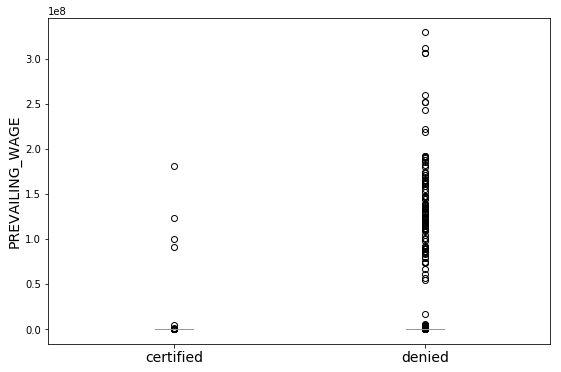

In [386]:
boxplot(df,'PREVAILING_WAGE')

In [387]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df['JOB_TITLE'] = df['JOB_TITLE'].str.lower()
df['WORKSITE'] = df['WORKSITE'].str.lower()

In [388]:
df['SOC_NAME'].value_counts()

software developers, applications                     162018
computer systems analysts                             159803
computer programmers                                  130823
computer occupations, all other                        81738
software developers, systems software                  28936
management analysts                                    22088
accountants and auditors                               17522
computer systems analyst                               17071
network and computer systems administrators            16416
financial analysts                                     13617
mechanical engineers                                   13260
database administrators                                12499
market research analysts and marketing specialists     11970
operations research analysts                           11116
electronics engineers, except computer                  9523
electrical engineers                                    8589
computer and information

In [389]:
import sys
df['SOC_NAME1'] = 'others'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('computer','software')] = 'it'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('chief','management')] = 'manager'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('mechanical')] = 'mechanical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('database')] = 'database'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('sales','market')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('financial')] = 'finance'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('public','fundraising')] = 'pr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('education','law')] = 'administrative'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('auditors','compliance')] = 'audit'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('distribution','logistics')] = 'scm'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('recruiters','human')] = 'hr'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('agricultural','farm')] = 'agri'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('construction','architectural')] = 'estate'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('forencsic','health')] = 'medical'
df['SOC_NAME1'][df['SOC_NAME'].str.contains('teachers')] = 'education'



C:\Users\jhaas\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jhaas\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\jhaas\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jhaas\Anaconda2\l

In [390]:
s=pd.crosstab(df.CASE_STATUS, df.SOC_NAME1,margins=True)
print s
s=s/s.loc['All']
print('******PERCENTAGE*******')
print(s)

SOC_NAME1    administrative  agri  audit  database  education  estate  \
CASE_STATUS                                                             
CERTIFIED              1186   566  17004     12381      16736     800   
DENIED                   78    39    531       168        572      81   
All                    1264   605  17535     12549      17308     881   

SOC_NAME1    finance  hr      it  manager  mechanical  others    pr   scm  \
CASE_STATUS                                                                 
CERTIFIED      18872   1  433468      728       13526  391037  2034  5912   
DENIED           459   0    4150       74         288    8862   122   246   
All            19331   1  437618      802       13814  399899  2156  6158   

SOC_NAME1       All  
CASE_STATUS          
CERTIFIED    914251  
DENIED        15670  
All          929921  
******PERCENTAGE*******
SOC_NAME1    administrative      agri     audit  database  education  \
CASE_STATUS                               

In [391]:
df['SOC_NAME1'].value_counts()

it                437618
others            399899
finance            19331
audit              17535
education          17308
mechanical         13814
database           12549
scm                 6158
pr                  2156
administrative      1264
estate               881
manager              802
agri                 605
hr                     1
Name: SOC_NAME1, dtype: int64

In [392]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.SOC_NAME1)
# print list(le.classes_)
df['SOC_N']=le.transform(df['SOC_NAME1'])

In [393]:
# from sklearn import preprocessing
# class_mapping = {'computer':0, np.nan:0}
# df["SOC_NAME1"] = df["SOC_NAME1"].map(class_mapping)

## Splitting city and state and capturing state in another variable
df['state'] = df.WORKSITE.str.split('\s+').str[-1]

In [394]:

le = preprocessing.LabelEncoder()
le.fit(df.state)
# print list(le.classes_)
df['state1']=le.transform(df['state'])
# print(df.state1)

In [395]:
# dropping these columns
df = df.drop('EMPLOYER_NAME', axis = 1)
df = df.drop('SOC_NAME', axis = 1)
df = df.drop('SOC_NAME1', axis = 1)
df = df.drop('JOB_TITLE', axis = 1)
df = df.drop('WORKSITE', axis = 1)
df = df.drop('CASE_ID', axis = 1)
df = df.drop('state' , axis=1)

In [396]:
##check count of NAN
count_nan = len(df) - df.count()
print(count_nan)

CASE_STATUS           0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
SOC_N                 0
state1                0
dtype: int64


In [397]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.CASE_STATUS)
print list(le.classes_)
y=le.transform(df['CASE_STATUS'])

['CERTIFIED', 'DENIED']


In [398]:
X = df.drop('CASE_STATUS', axis=1)
# y = df.CASE_STATUS

seed = 7
test_size = 0.40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
X_train.columns

Index([u'FULL_TIME_POSITION', u'PREVAILING_WAGE', u'YEAR', u'SOC_N',
       u'state1'],
      dtype='object')

In [399]:
print(X_train.isnull().sum())

FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
SOC_N                 0
state1                0
dtype: int64


In [400]:
from sklearn.preprocessing import OneHotEncoder
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)


In [402]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
## Logistic Regression
print "==================Logistic Regression Model============================================"
LogReg = LogisticRegression()
LogReg.fit(X_train_encode, y_train)
y_pred = LogReg.predict(X_test_encode)

==================Logistic Regression Model============================================


In [403]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[365609,      2],
       [  6319,     39]], dtype=int64)

In [404]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    365611
          1       0.95      0.01      0.01      6358

avg / total       0.98      0.98      0.97    371969



In [405]:
print roc_auc_score(y_test, y_pred)

0.5030642670544848


0.5317993501256928


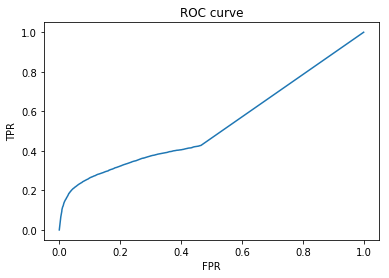

In [412]:
# from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(X_train_encode, y_train)
predictions = model.predict_proba(X_test_encode)
y_pred = model.predict(X_test_encode) 
print roc_auc_score(y_test, predictions[:,1])

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [413]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    365611
          1       0.19      0.07      0.10      6358

avg / total       0.97      0.98      0.97    371969



In [428]:
y_pred
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [415]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[363783,   1828],
       [  5935,    423]], dtype=int64)

In [437]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_encode, y_train);

In [438]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test_encode)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

('Mean Absolute Error:', 0.03, 'degrees.')


0.6193804187372077


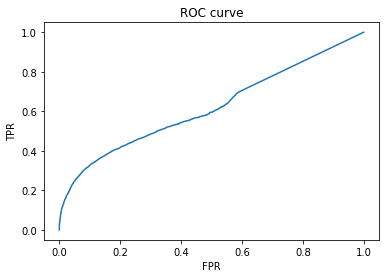

In [439]:
print roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


In [440]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred.round())
confusion_matrix

array([[364429,   1182],
       [  5966,    392]], dtype=int64)

In [441]:
print(classification_report(y_test, y_pred.round()))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99    365611
          1       0.25      0.06      0.10      6358

avg / total       0.97      0.98      0.98    371969



In [443]:
import pickle

"""Saving the Model"""
Random_forest_h1b = 'Random_forest_h1b.sav'
pickle.dump(rf, open(Random_forest_h1b, 'wb'))